# Computing and visualizing uncertainty

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib as mpl
mpl.rcParams.update({'font.size':16})
from scipy.stats import binned_statistic

In [2]:
n = 50
x = np.linspace(0,100,n)
y = np.log(1+x)

## What is the difference between these two datasets?

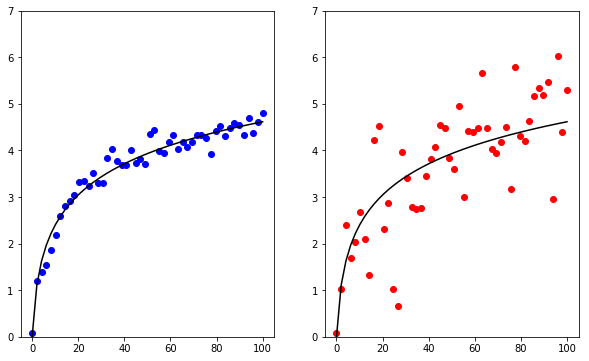

In [3]:
noises = [0.2,0.8]
colors = ['b','r','c','m']
y_new = [y + noise*np.random.randn(n) for noise in noises]
fig,axes = plt.subplots(1,2,figsize=(10,6))
for i,ax in enumerate(axes):
    ax.scatter(x,y_new[i],color=colors[i])
    ax.plot(x,y,'k')
    ax.set_ylim(0,7)

In [4]:
def get_stats(x,y):
    means,stdevs = [binned_statistic(x, y, statistic=kind, bins=10) for kind in ('mean','std')]
    return {'x_bins':means.bin_edges[:-1],
            'mean':means.statistic,
            'stdev':stdevs.statistic}

## If only the means are shown, they look almost the same

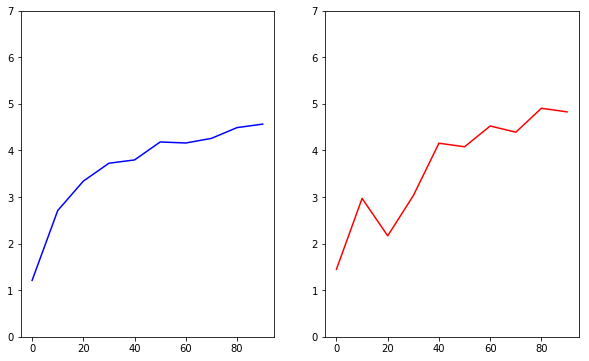

In [5]:
stats = [get_stats(x,y_) for y_ in y_new]
fig,axes = plt.subplots(1,2,figsize=(10,6))
for i,ax in enumerate(axes):
    ax.plot(stats[i]['x_bins'], stats[i]['mean'], color=colors[i])
    ax.set_ylim(0,7)

## Adding the standard deviation gives us a measure of uncertainty

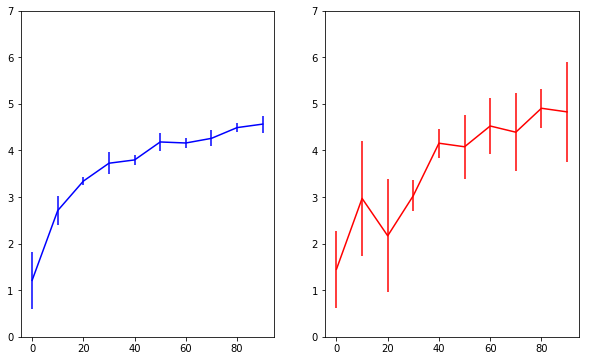

In [6]:
stats = [get_stats(x,y_) for y_ in y_new]
fig,axes = plt.subplots(1,2,figsize=(10,6))
for i,ax in enumerate(axes):
    ax.errorbar(stats[i]['x_bins'], stats[i]['mean'], yerr=stats[i]['stdev'], color=colors[i])
    ax.set_ylim(0,7)

## In which two datasets is the difference larger?  

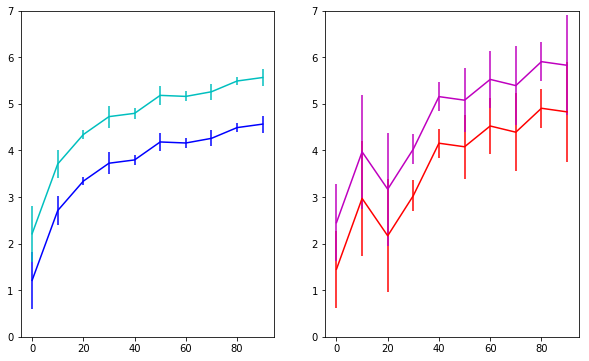

In [7]:
stats = [get_stats(x,y_) for y_ in y_new]
fig,axes = plt.subplots(1,2,figsize=(10,6))
for i,ax in enumerate(axes):
    for j in range(2):
        ax.errorbar(stats[i]['x_bins'], stats[i]['mean']+j, yerr=stats[i]['stdev'], color=colors[i+2*j])
    ax.set_ylim(0,7)

## The tradeoff between bias and variance

![bias-variance](images/bias-variance.png)